The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
ERRO RESIDUAL MÁXIMO BOSTON: 25.26299999999999
SCORE DE VARIÂNCIA BOSTON: 0.6692385602179018
ERRO RESIDUAL MÁXIMO DIABETES: 188.0
SCORE DE VARIÂNCIA DIABETES: 0.12723791659475736


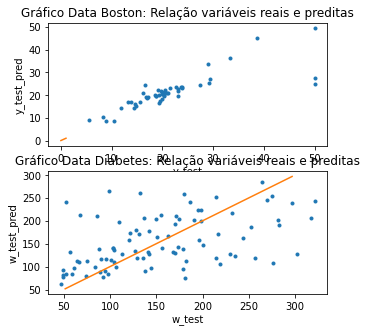

In [95]:
"""   Curso ML_DS: Exercício aula 1.

.. codeauthor:: Emanuelle Simas <ellesimas@gmail.com>

.. versionadded:: 20.01
      - Primeira célula 
        - Uso do modelo ExtraTreesRegressor
        - Uso das métricas max error e explained variance score
      - Segunda célula
        - Uso do modelo ExtraTreesRegressor
        - Uso das métricas max error e explained variance score
      

"""
#Carregamento de pacotes
%load_ext autoreload
%autoreload 2

#Garante que os gráficos seham gerados ao longo do notebook
%matplotlib inline


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.datasets import load_boston as Boston #importação dos dados;
from sklearn.model_selection import train_test_split as split # Divisão dos dados em teste e treino;
from sklearn.ensemble import ExtraTreesRegressor as ETR #Método escolhido para o treino dos dados; 
from sklearn.metrics import max_error as ME #Métrica de  cálculo do erro residual
from sklearn.metrics import explained_variance_score as EVS #Métrica de variância explicada

Boston()

Boston = Boston()

#print(Boston.DESCR)

X,y = Boston.data, Boston.target #Renomeação do dados e atributos

X_train,X_test, y_train, y_test = split(X,y,test_size=0.1, random_state=0) #Separação do conjunto de dados treino e teste

metod = ETR() #Armazenamento do método de treinamento de dados em um objeto

metod.fit(X_train, y_train) #Constrói uma floresta de árvores a partir do conjunto de treinamento

y_test_pred=metod.predict(X_test) #Aplica o modelo no conjunto de dados teste x fazendo predição

#CALCULANDO MÉTRICAS DE DESEMPENHO
max_error = ME(y_test, y_test_pred)
print(f'ERRO RESIDUAL MÁXIMO BOSTON: {max_error}') #24.99199999999999

variance_score=EVS(y_test, y_test_pred)
print(f'SCORE DE VARIÂNCIA BOSTON: {variance_score}') # 0.6816024739106727 


############################ Fim da primeira célula ######################################

from sklearn.datasets import load_diabetes as Diabetes #importação dos dados;
from sklearn.ensemble import BaggingRegressor as BR #Método escolhido para o treino dos dados;


Diabetes = Diabetes()

#print(Diabetes.DESCR)

Z,w = Diabetes.data, Diabetes.target #Renomeação do dados e atributos

Z_train,Z_test, w_train, w_test = split(Z,w,test_size=0.2, random_state=0) #Separação do conjunto de dados treino e teste

model = BR(random_state=0) #O argumento 0 define a semente do regressor reduzindo sua aleatoriedade
model.fit(Z_train, w_train) #

w_test_pred=model.predict(Z_test) #Aplica o modelo no conjunto de dados teste x fazendo predição


#CALCULANDO MÉTRICAS DE DESEMPENHO
max_error_D = ME(w_test, w_test_pred)
print(f'ERRO RESIDUAL MÁXIMO DIABETES: {max_error_D}') #215.39999999999998

variance_score_D=EVS(w_test, w_test_pred)
print(f'SCORE DE VARIÂNCIA DIABETES: {variance_score_D}') # 0.14589371000418316 

######################################### fim da segunda célula ######################################

#Plotando Gráficos
#Plotando gráfico da relação entre os dados
fig,(bx,dx) = plt.subplots(2, 1, figsize=(5, 5))

bx.plot(y_test, y_test_pred,'.') #Valores verdadeiros versus valores da predição
bx.plot(plt.gca().get_ylim(), plt.gca().get_ylim()) #plota a reta X
bx.set(title="Gráfico Data Boston: Relação variáveis reais e preditas", xlabel='y_test', ylabel='y_test_pred')

#Plotando gráfico da relação entre os dados 
dx.plot(w_test, w_test_pred,'.') #Valores verdadeiros versus valores da predição
dx.plot(plt.gca().get_ylim(), plt.gca().get_ylim()) #plota a reta Z
dx.set(title="Gráfico Data Diabetes: Relação variáveis reais e preditas", xlabel='w_test', ylabel='w_test_pred')

plt.show()
